# Time Invariant Columns(Stationary) - 7 columns
### btc_dr, gold_dr, oil_dr, sp500_dr, BVOL, GVOL, VIX

------------------------------------------------------------------------

# Time Dependent Columns(non- stationary) - 7 columns
### btc_price, gold_price, oil_wti_price, sp500_close, btc_num_trans, btc_google_search, OVOL


#**First order differencing makes all non-stationary columns Stationary** 

In [225]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt  

In [226]:

df = pd.read_csv('/content/dataset_final.csv', parse_dates=['date'], index_col=['date'])
df = df.drop('Unnamed: 0', axis=1)
df.head()

,btc_price,gold_price,oil_wti_price,sp500_close,btc_num_trans,btc_google_search,btc_dr,gold_dr,oil_dr,sp500_dr,BVOL,GVOL,OVOL,VIX
date,,,,,,,,,,,,,,
2015-01-15,211.91,1352.8,46.37,1992.67,102309.0,3,0.568670,0.021141,-0.044705,-0.009291,0.853974,0.344132,0.344950,22.39
2015-01-16,199.46,1364.9,48.49,2019.42,104699.0,3,-0.060548,0.008905,0.044705,0.013335,0.857286,0.348453,0.346061,20.95
2015-01-20,208.00,1377.4,46.79,2022.55,98485.0,3,0.041924,0.009116,-0.035688,0.001549,0.857176,0.348518,0.346647,19.89
2015-01-21,225.51,1378.4,47.85,2032.12,98485.0,3,0.080826,0.000726,0.022402,0.004720,0.893605,0.350149,0.347336,18.85
2015-01-22,226.32,1390.2,45.93,2063.15,93698.0,3,0.003585,0.008524,-0.040953,0.015154,0.904949,0.351242,0.343230,16.40


In [227]:
df.describe()

,btc_price,gold_price,oil_wti_price,sp500_close,btc_num_trans,btc_google_search,btc_dr,gold_dr,oil_dr,sp500_dr,BVOL,GVOL,OVOL,VIX
count,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,4211.423240,1340.306056,52.089947,2485.500621,244992.591976,12.485238,0.003159,0.000199,-0.000501,0.000271,0.668661,0.145395,0.350590,16.232226
std,3977.583336,115.686006,10.780374,377.578605,77850.372709,14.681053,0.049246,0.009308,0.035508,0.011765,0.296051,0.052264,0.249379,7.854295
min,199.460000,1097.700000,-36.980000,1829.080000,85232.000000,2.000000,-0.491226,-0.071322,-0.281382,-0.127652,0.137440,0.065379,0.130754,9.140000
25%,455.190000,1270.300000,46.280000,2108.290000,197876.000000,3.000000,-0.013026,-0.003995,-0.013902,-0.003026,0.434661,0.114385,0.226720,12.340000
50%,3430.240000,1324.200000,51.980000,2468.110000,244259.000000,10.000000,0.002636,0.000151,0.000418,0.000504,0.596158,0.129315,0.286832,14.150000
75%,7380.010000,1391.800000,58.910000,2792.670000,303724.000000,15.000000,0.021901,0.004371,0.012646,0.004723,0.913385,0.166992,0.368328,17.330000
max,19039.000000,1768.900000,77.410000,3386.150000,439549.000000,100.000000,0.568670,0.067930,0.425832,0.089683,1.414832,0.371978,1.803450,82.690000


In [228]:
feature_range = (0, 1)
#scaler = MinMaxScaler(feature_range)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [229]:
df.info(); pd.DataFrame(scaled_data).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1321 entries, 2015-01-15 to 2020-04-27
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   btc_price          1321 non-null   float64
 1   gold_price         1321 non-null   float64
 2   oil_wti_price      1321 non-null   float64
 3   sp500_close        1321 non-null   float64
 4   btc_num_trans      1321 non-null   float64
 5   btc_google_search  1321 non-null   int64  
 6   btc_dr             1321 non-null   float64
 7   gold_dr            1321 non-null   float64
 8   oil_dr             1321 non-null   float64
 9   sp500_dr           1321 non-null   float64
 10  BVOL               1321 non-null   float64
 11  GVOL               1321 non-null   float64
 12  OVOL               1321 non-null   float64
 13  VIX                1321 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 154.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321

## Checking how to convert Non - Stationary to Stationary series

Column:  btc_price
ADF Statistic: -8.683301
p-value: 0.000000
None
Column:  gold_price
ADF Statistic: -9.289500
p-value: 0.000000
None
Column:  oil_wti_price
ADF Statistic: -6.702252
p-value: 0.000000
None
Column:  sp500_close
ADF Statistic: -10.740826
p-value: 0.000000
None
Column:  btc_num_trans
ADF Statistic: -12.114717
p-value: 0.000000
None
Column:  OVOL
ADF Statistic: -11.003434
p-value: 0.000000
None


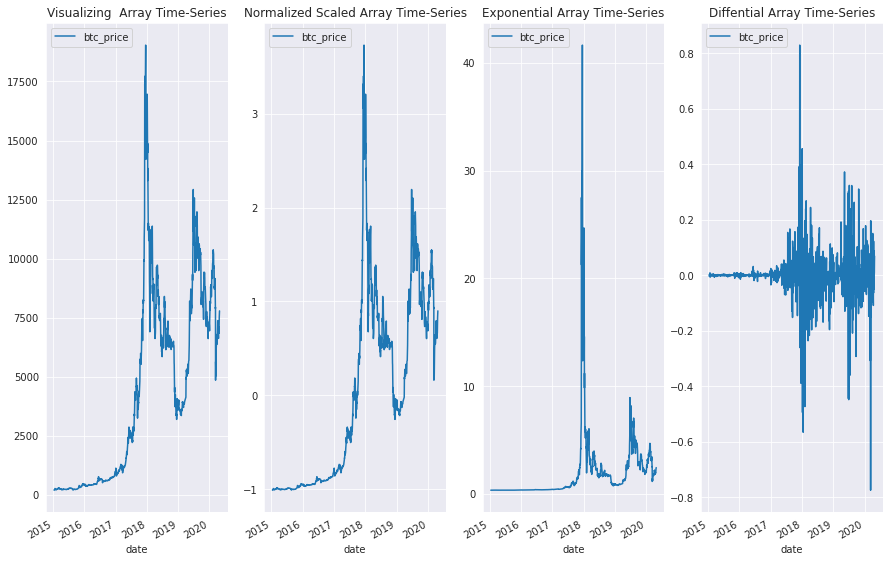

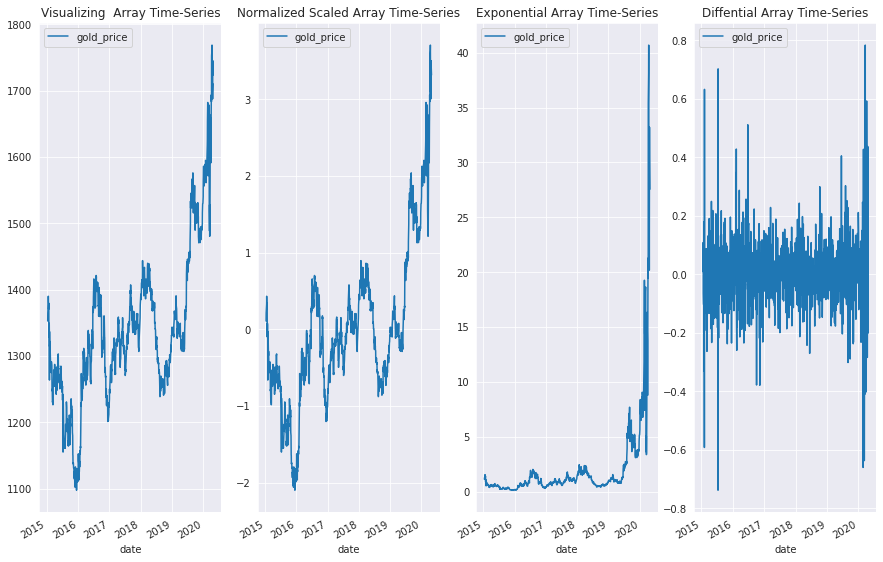

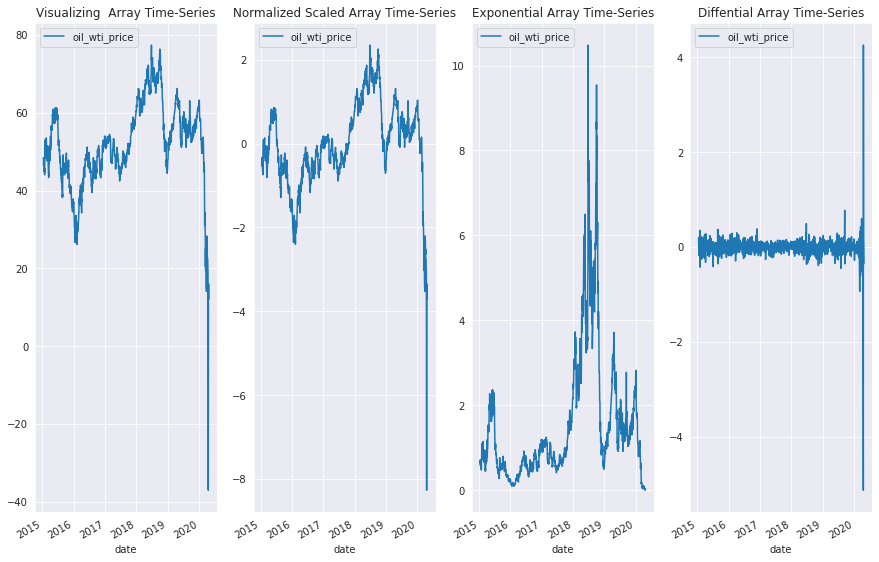

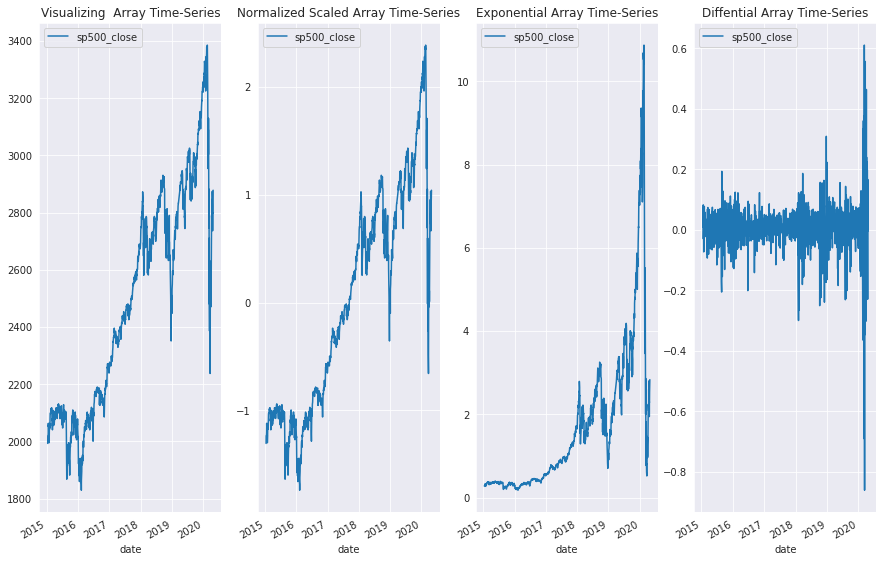

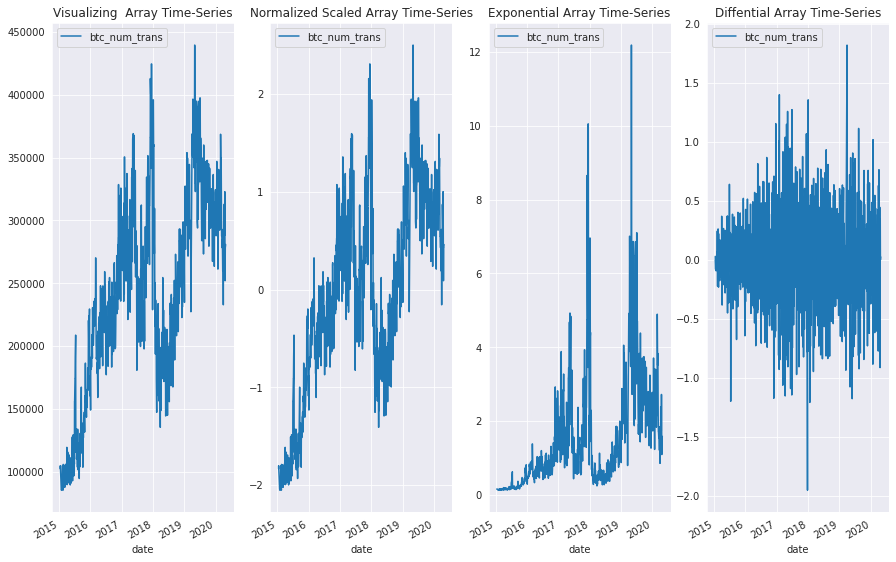

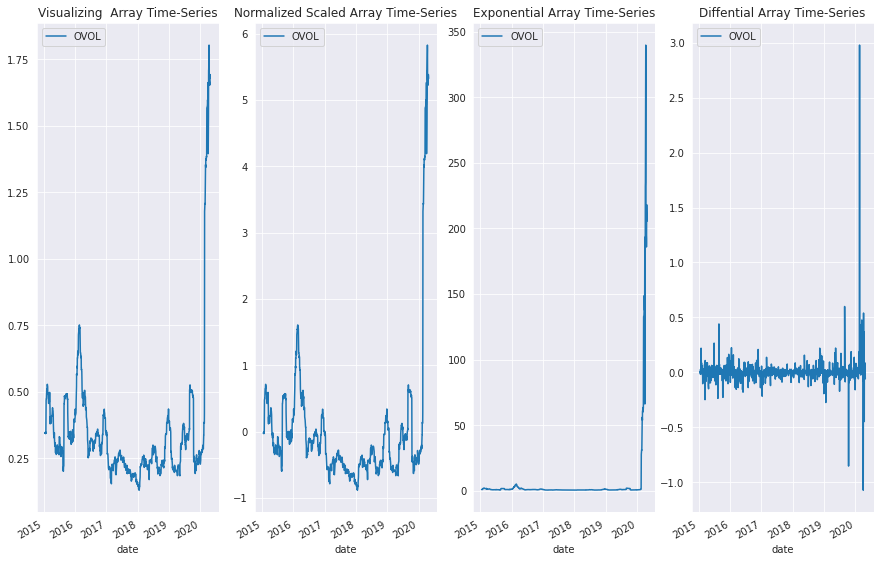

In [230]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
def normal(ts):
  mu = np.mean(ts)
  sigma = np.std(ts)
  norm_ts = (ts - mu) / sigma
  return norm_ts

col = ["btc_price", "gold_price", "oil_wti_price", "sp500_close", "btc_num_trans",  "OVOL"]

for i in col:
  ds = df.loc[:,i]
  dt = normal(ds)
  exp_ts = np.exp(dt)
  diff_ts = dt.diff().dropna()
  print("Column: ", i)
  print(perform_adf_test(diff_ts))
  # Visualize the trends in data
  sns.set_style('darkgrid')
  fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (15,10))
  ds.plot(kind = 'line', legend = 'reverse', title = 'Visualizing  Array Time-Series', ax =ax[0])
  dt.plot(kind = 'line', legend = 'reverse', title = 'Normalized Scaled Array Time-Series', ax =ax[1])
  exp_ts.plot(kind = 'line', legend = 'reverse', title = 'Exponential Array Time-Series', ax =ax[2])
  diff_ts.plot(kind = 'line', legend = 'reverse', title = 'Diffential Array Time-Series', ax =ax[3])

In [231]:
data = pd.DataFrame()
scaler = StandardScaler()
for i in col:
  ds = df.loc[:,i]
  dt = normal(ds)
  diff_ts = dt.diff().dropna()
  data[i] = diff_ts

In [232]:
col1 = ["btc_dr", "gold_dr", "oil_dr", "sp500_dr", "BVOL", "GVOL", "VIX", "btc_google_search"]
scaler = StandardScaler()
for i in col1:
  df[i] = scaler.fit_transform(np.array(df[i]).reshape(-1,1))

In [233]:
dataset = df[col1].merge(data,left_index=True, right_index=True)
dataset

,btc_dr,gold_dr,oil_dr,sp500_dr,BVOL,GVOL,VIX,btc_google_search,btc_price,gold_price,oil_wti_price,sp500_close,btc_num_trans,OVOL
date,,,,,,,,,,,,,,
2015-01-16,-1.294149,0.935573,1.273613,1.110756,0.637380,3.886673,0.600889,-0.646332,-0.003131,0.104633,0.196728,0.070873,0.030712,0.004455
2015-01-20,0.787482,0.958341,-0.991337,0.108611,0.637007,3.887913,0.465880,-0.646332,0.002148,0.108092,-0.157754,0.008293,-0.079850,0.002351
2015-01-21,1.577742,0.056560,0.645252,0.378296,0.760103,3.919137,0.333418,-0.646332,0.004404,0.008647,0.098364,0.025355,0.000000,0.002763
2015-01-22,0.008662,0.894687,-1.139657,1.265460,0.798435,3.940048,0.021369,-0.646332,0.000204,0.102039,-0.178169,0.082213,-0.061513,-0.016472
2015-01-23,0.700360,-0.610587,-0.399885,-0.491298,1.367737,3.924160,0.054484,-0.646332,0.002183,-0.065720,-0.062174,-0.030018,0.000000,0.026813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-21,-0.018209,-1.501232,0.014374,-2.672117,0.084115,4.182363,3.716288,0.239499,0.003896,-0.202348,4.258422,-0.229443,0.000000,-0.034804
2020-04-22,0.758230,3.147055,12.011304,1.904606,0.140613,4.172025,3.279419,0.239499,0.071216,0.436692,0.438926,0.166253,0.344008,0.016906
2020-04-23,0.913797,0.416637,2.804298,-0.068953,0.140528,4.149280,3.202999,0.239499,0.088527,0.061396,0.131771,-0.004001,0.000000,0.086223


### dataset.to_csv('stationary_data.csv',index=True)

Column:  btc_dr
ADF Statistic: -11.003434
p-value: 0.000000
None
Column:  gold_dr
ADF Statistic: -11.003434
p-value: 0.000000
None
Column:  oil_dr
ADF Statistic: -11.003434
p-value: 0.000000
None
Column:  sp500_dr
ADF Statistic: -11.003434
p-value: 0.000000
None
Column:  BVOL
ADF Statistic: -11.003434
p-value: 0.000000
None
Column:  GVOL
ADF Statistic: -11.003434
p-value: 0.000000
None
Column:  VIX
ADF Statistic: -11.003434
p-value: 0.000000
None
Column:  btc_google_search
ADF Statistic: -11.003434
p-value: 0.000000
None
Column:  btc_price
ADF Statistic: -11.003434
p-value: 0.000000
None
Column:  gold_price
ADF Statistic: -11.003434
p-value: 0.000000
None
Column:  oil_wti_price
ADF Statistic: -11.003434
p-value: 0.000000
None
Column:  sp500_close
ADF Statistic: -11.003434
p-value: 0.000000
None
Column:  btc_num_trans
ADF Statistic: -11.003434
p-value: 0.000000
None
Column:  OVOL
ADF Statistic: -11.003434
p-value: 0.000000
None


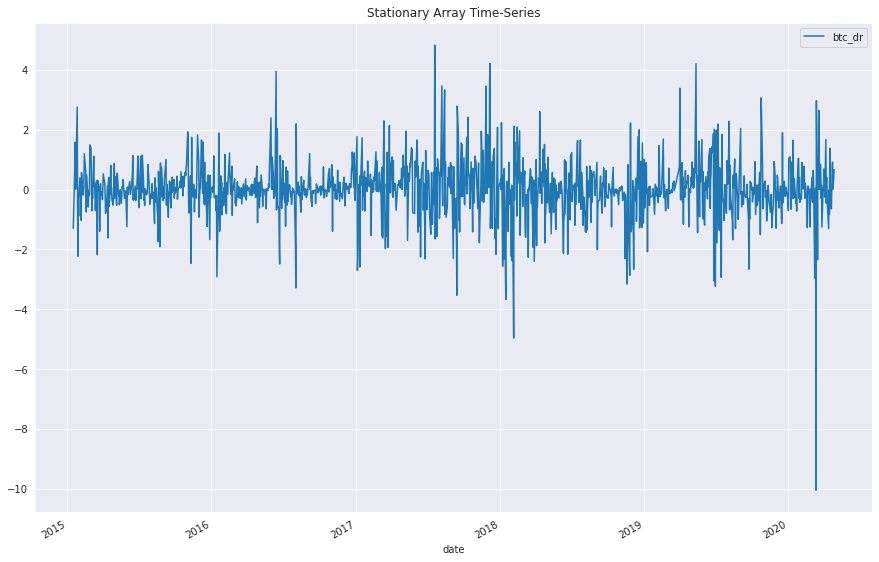

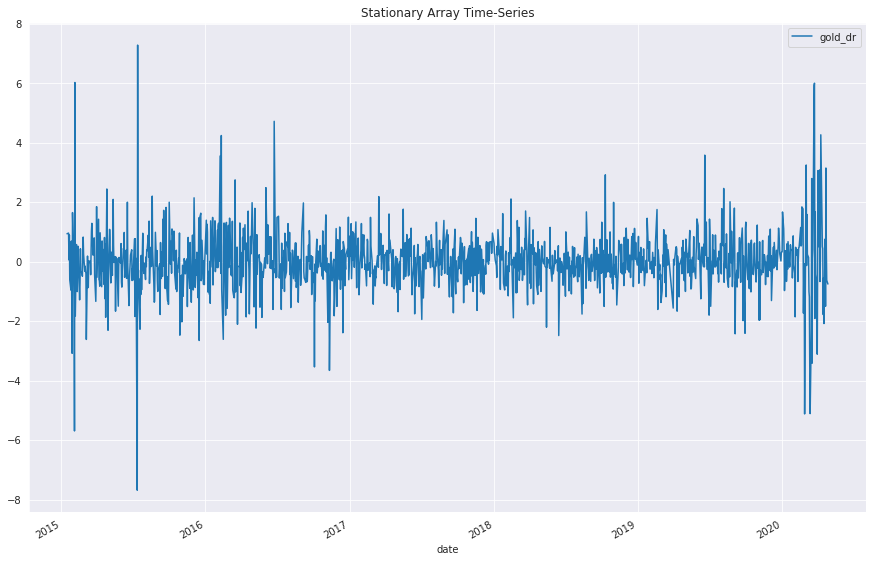

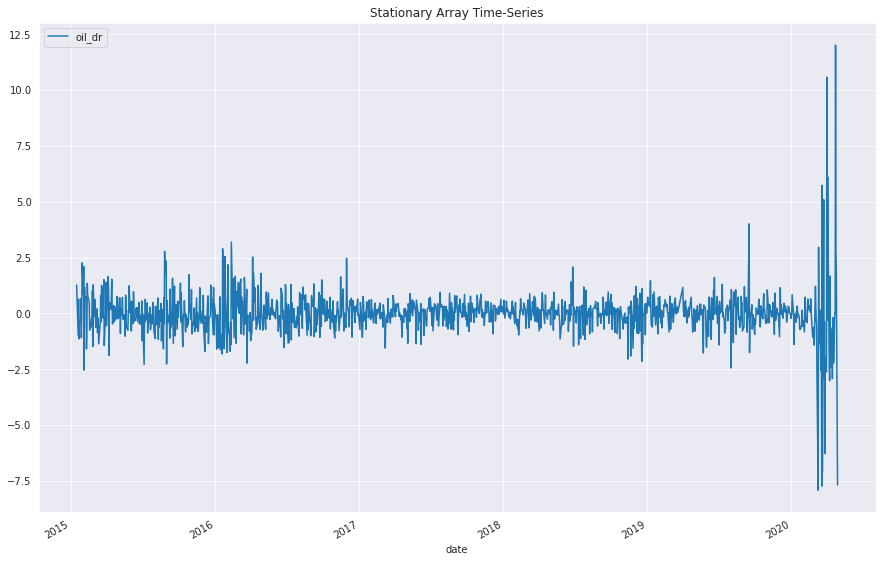

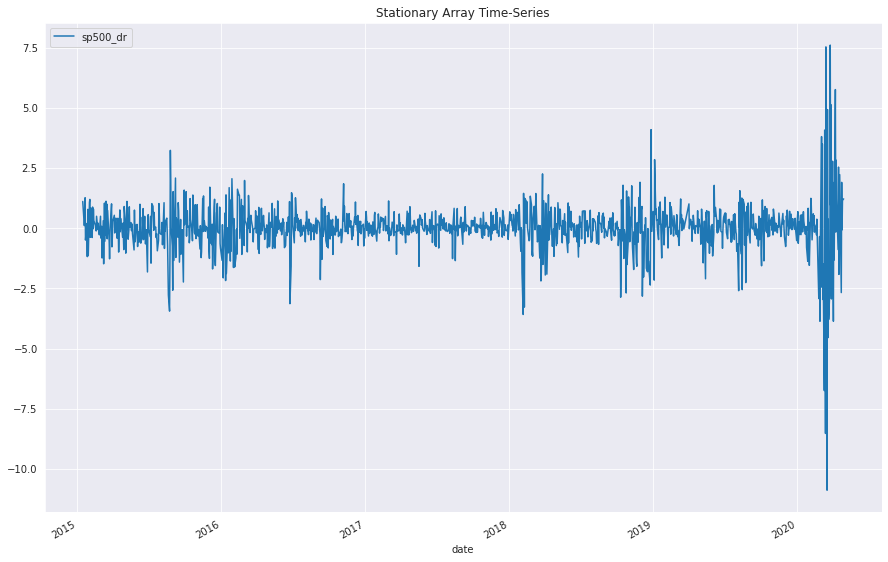

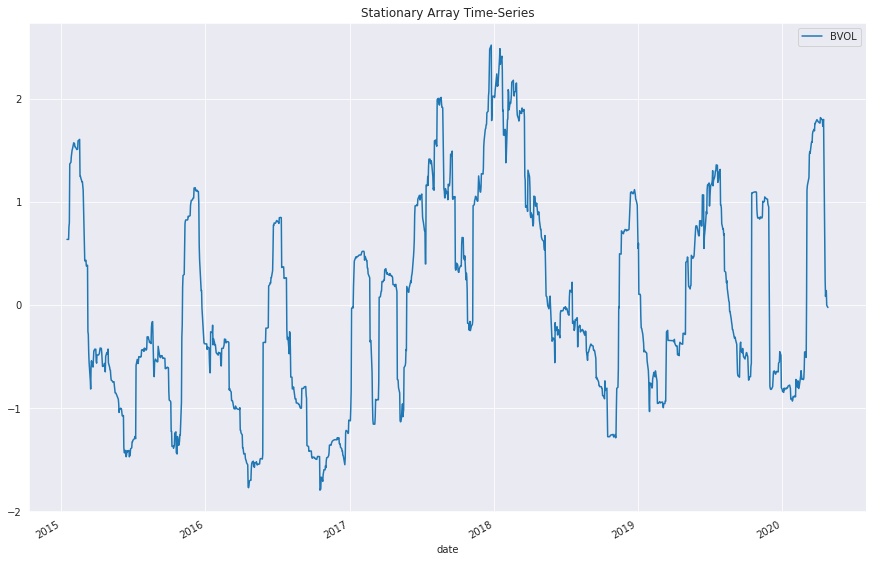

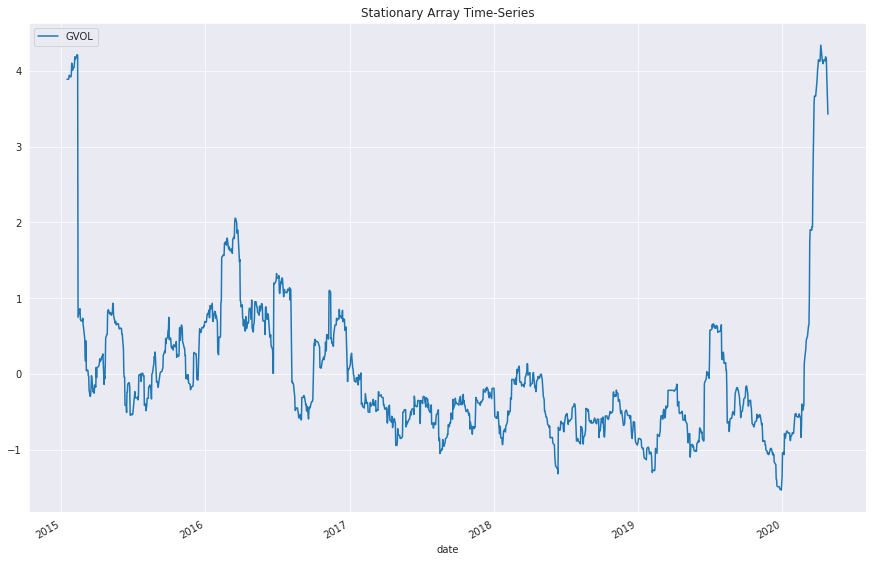

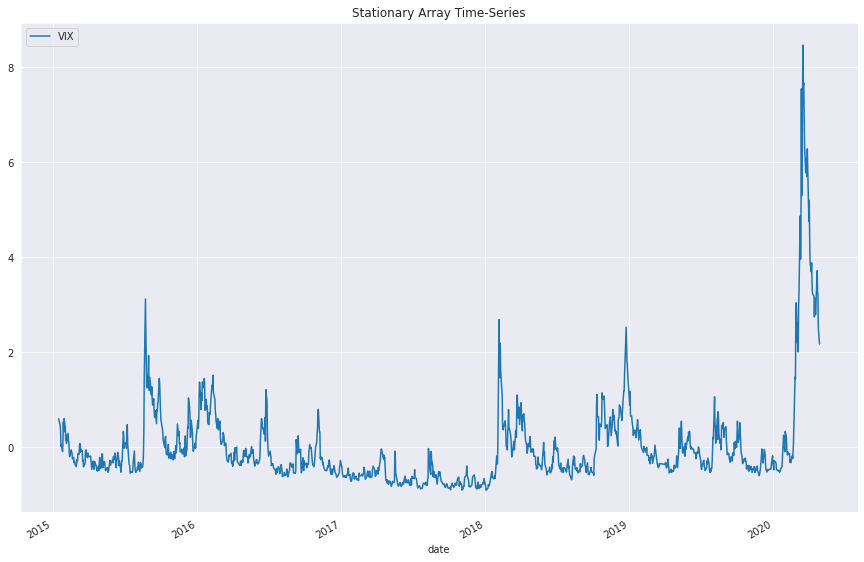

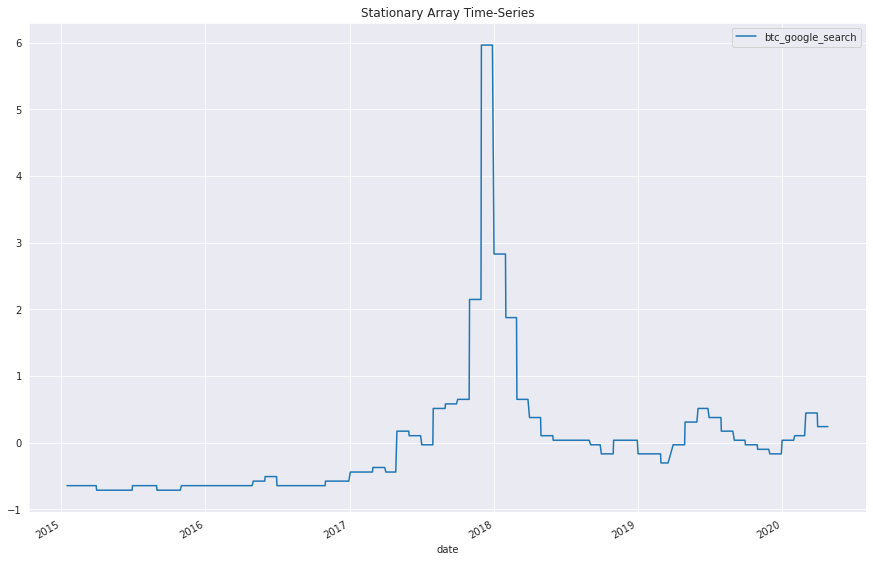

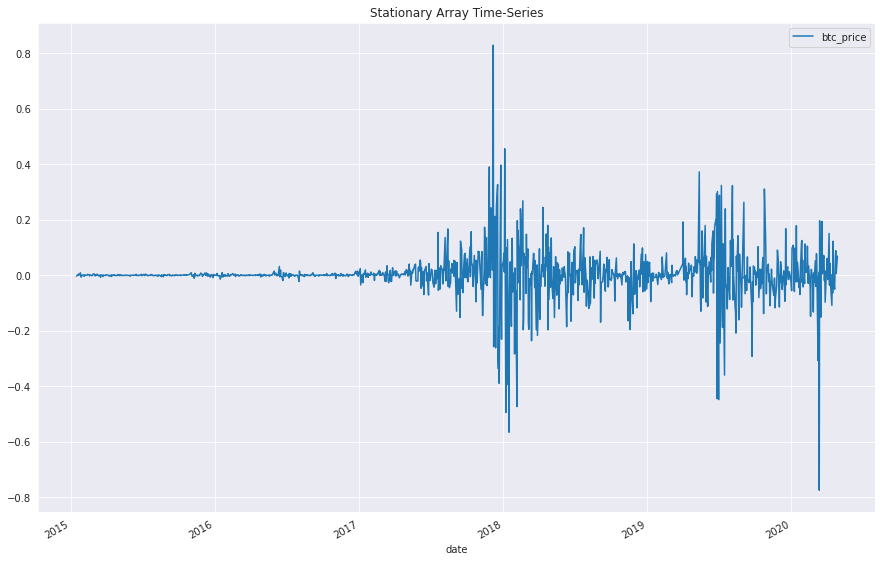

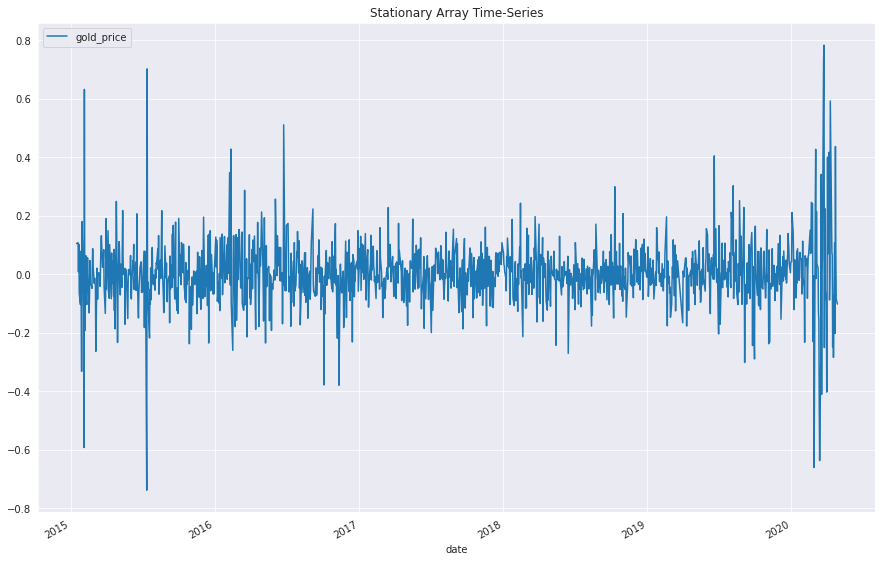

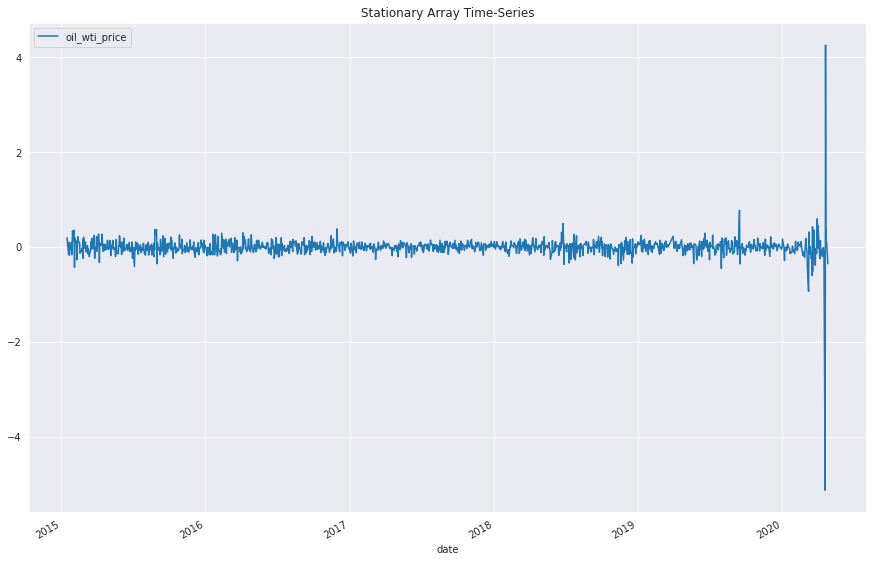

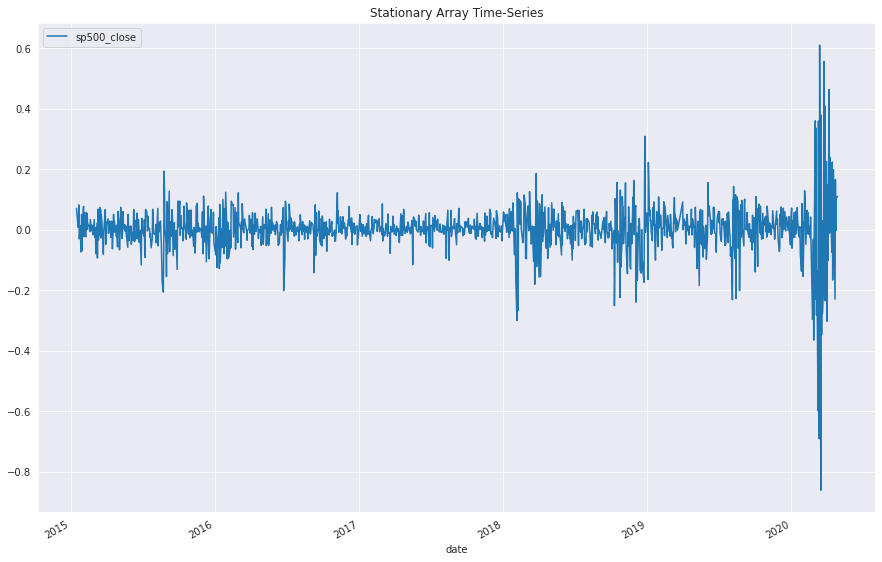

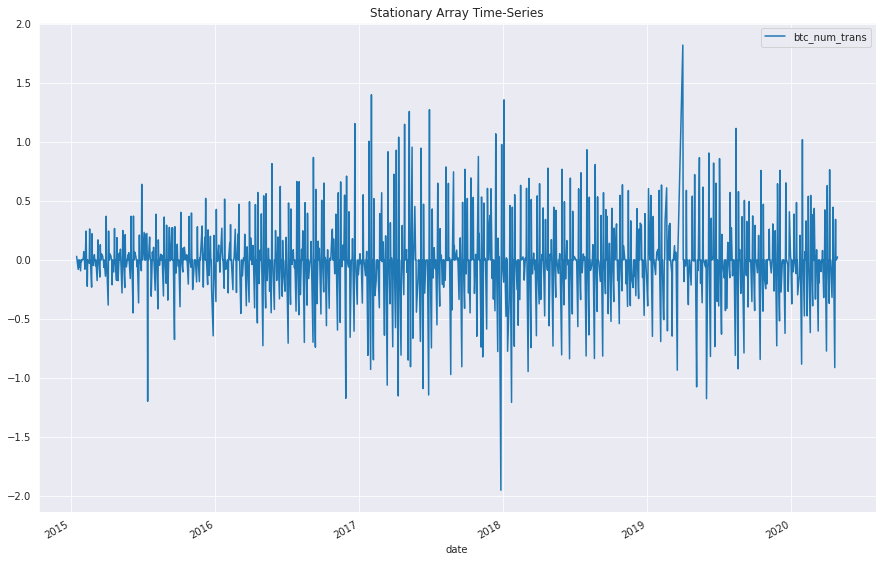

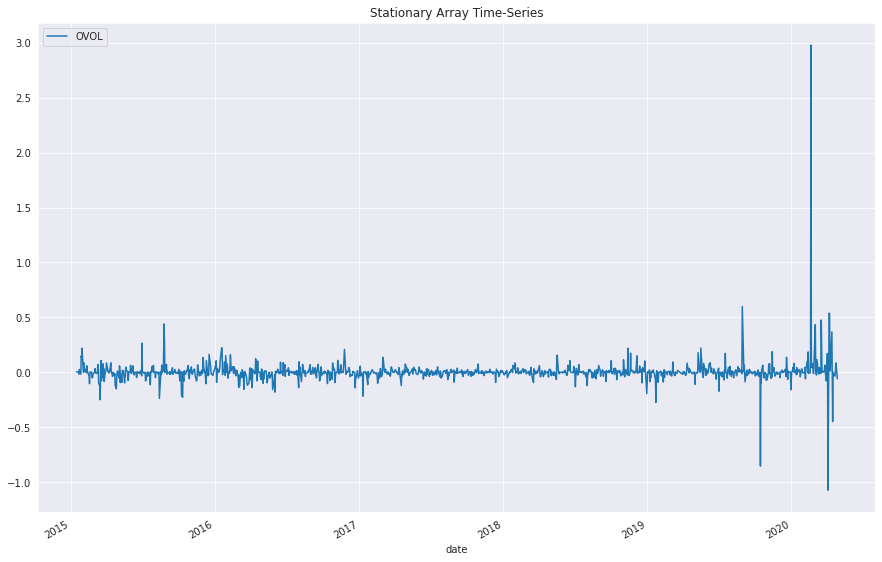

In [178]:
for i in dataset.columns:
  z = dataset.loc[:,i]
  print("Column: ", i)
  print(perform_adf_test(diff_ts))
  sns.set_style('darkgrid')
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,10))
  z.plot(kind = 'line', legend = 'reverse', title = 'Stationary Array Time-Series', ax =ax)

In [179]:
#creating the train and validation set
train = dataset[:int(0.8*(len(dataset)))]
valid = dataset[int(0.8*(len(dataset))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


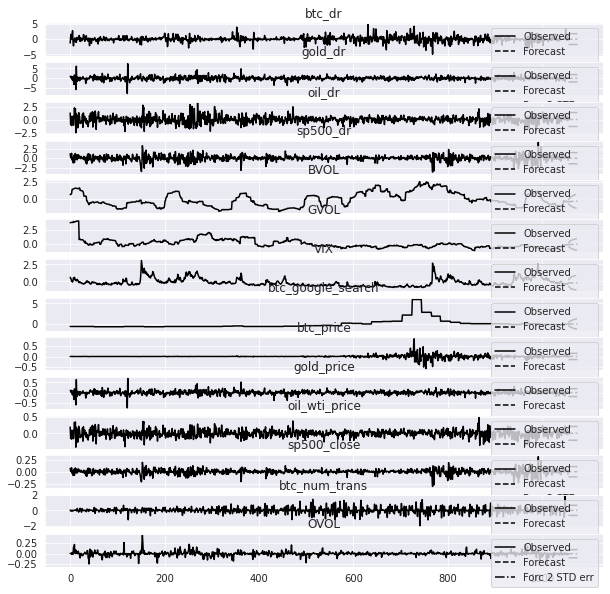

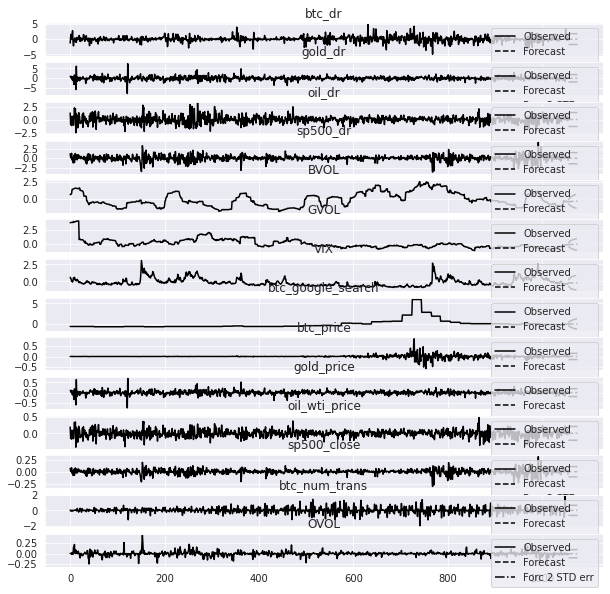

In [180]:
# forecasting
lag_order = model_fit.k_ar
model_fit.forecast(dataset.values[-lag_order:], 5)
model_fit.plot_forecast(20)

In [181]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 15, Sep, 2020
Time:                     09:45:58
--------------------------------------------------------------------
No. of Equations:         14.0000    BIC:                   -58.3497
Nobs:                     1055.00    HQIC:                  -58.9629
Log likelihood:           10552.7    FPE:                1.69889e-26
AIC:                     -59.3373    Det(Omega_mle):     1.39421e-26
--------------------------------------------------------------------
Results for equation btc_dr
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       -0.012867         0.031792           -0.405           0.686
L1.btc_dr                    0.001318         0.044912            0.029           0.977
L1.gold_dr                  -0.

In [224]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[dataset.columns])
for j in range(0,14):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in range(len(dataset.columns)):
    print('rmse value for', dataset.columns[i], 'is : ', sqrt(mean_squared_error(pred.iloc[:,i], valid.iloc[:,i])))

rmse value for btc_dr is :  1.1282800813425222
rmse value for gold_dr is :  1.233869942695373
rmse value for oil_dr is :  1.7697131308668388
rmse value for sp500_dr is :  1.6955588563281088
rmse value for BVOL is :  0.9722882848817671
rmse value for GVOL is :  1.4458682112917456
rmse value for VIX is :  1.9563855255139566
rmse value for btc_google_search is :  0.2518547751683647
rmse value for btc_price is :  0.11613947044271891
rmse value for gold_price is :  0.15565427845439722
rmse value for oil_wti_price is :  0.4410424512673128
rmse value for sp500_close is :  0.14204401562806432
rmse value for btc_num_trans is :  0.33444104612673187
rmse value for OVOL is :  0.22344543093683533
